## Intermediate outputs of AlexNet

In [7]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.image as mpimg

import alexnet

original_model = alexnet.alexnet(pretrained=True)

class MyNet(nn.Module):
            def __init__(self, i):
                super(MyNet, self).__init__()
                i = 13 - i
                #print(i)
                if i == 0:
                    self.features = nn.Sequential(
                        *list(original_model.features.children())
                    )    
                else:            
                    self.features = nn.Sequential(
                        *list(original_model.features.children())[:-i]
                    )
            def forward(self, x):
            	#print("Goforward!")
                x = self.features(x)
                #print("ForwardFinish")
                return x

In [20]:
def showimg(img, i=1, j=1, gray=False):
	title = ['Conv', 'Relu', 'Pool', 'Conv', 'Relu'
	, 'Pool','Conv', 'Relu','Conv', 'Relu'
	, 'Conv', 'Relu','Conv', 'Relu','Pool']
	r = 10
	c = 25
	j = j + 5
	fig = plt.figure(1)
	ax = fig.add_subplot(r,c,(i-1)*c + j)
	ax.axis('off')	
	if i == 1:
		ax.set_title(title[j - 7])
	tmp = img.numpy()
	if gray == True:
		ax.imshow(tmp, cmap="gray")
		return
	else:
		img = img / 2 + 0.5
		tmp = img.numpy()
		ax.imshow(np.transpose(tmp, (1, 2, 0)))


def plot_layer(x, j=1, size=1, gray=True):
	data = x[0,:,:,:].data
	if size == 1:
		showimg(data, 1, j, gray)
	else:
		for i in range(size):
			showimg(data[i], i+1, j, gray)

def runmodel(x, i=13):
	net = MyNet(i)
	return net(x)

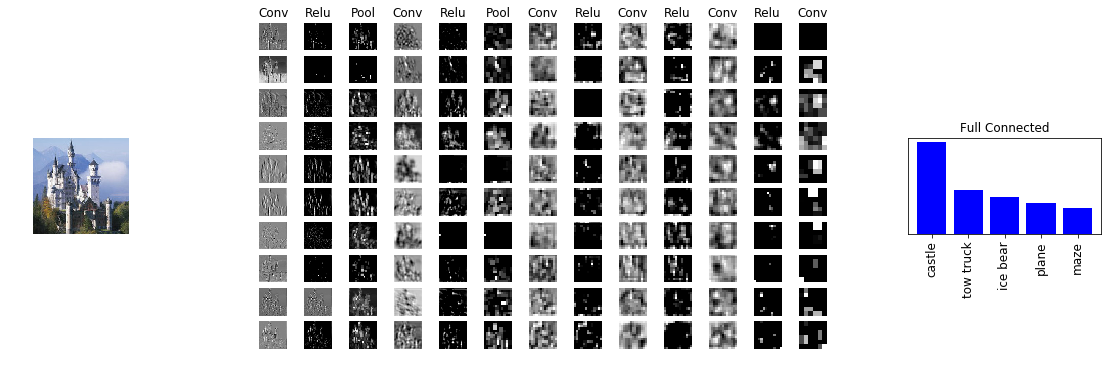

In [21]:
#Plot original picture
timg=mpimg.imread('image2.jpg')
fig = plt.figure(1)
ax = fig.add_subplot(3, 5, 6)
ax.imshow(timg)
ax.axis('off')	


#Plot intermediate graphs
timg = timg - np.average(timg)
timg = timg / timg.max()
if timg.min() < -1:
	timg = timg / (-timg.min())
timg = np.transpose(timg, [2,0,1])
timg = torch.from_numpy(timg)

x = Variable(timg).type(torch.FloatTensor)
x = torch.unsqueeze(x, 0)

for i in range(13):
	y = runmodel(x, i+1)
	plot_layer(y, i+2, 10)


#Visualize the result
pred = original_model(x).data.numpy()
pred = np.squeeze(pred)
index = pred.argsort()[-100:][::-20]
y = [pred[i] for i in index]
fig = plt.figure(1)
ax = fig.add_subplot(3, 5, 10)
ax.bar(range(5), y, color='b')
myticks = ['castle', 'tow truck', 'ice bear', 'plane', 'maze']
ax.set_xticks(range(5))
ax.set_xticklabels(myticks, rotation='vertical', fontsize=12)
ax.get_yaxis().set_visible(False)
ax.set_title('Full Connected')

fig=plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()